<a href="https://colab.research.google.com/github/tugcegulsanusta/machine-learning-project/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Explore data



In [25]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head()


In [ ]:
#count NaN
df.isna().sum()

# Clear data

In [ ]:
df = df.dropna(axis = 1)
df = df.drop('id', axis= 1)
df.shape
df.head()

In [ ]:
#count the class results
df['diagnosis'].value_counts()


In [ ]:
#replace data M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].replace(['M'], '1')
df['diagnosis'] = df['diagnosis'].replace(['B'], '0')
df['diagnosis'] = df['diagnosis'].astype('int')

df.info()

In [ ]:
#drop the diagnosis(Diagnosis is our class label and store it in  'y')
y = df.diagnosis
x = df.drop('diagnosis', axis = 1)
x.head()

# Explore relations

In [ ]:
#first 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((x- x.mean())/x.std()).iloc[:,0:15]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data= data)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'compactness_se'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se'),
  Text(4, 0, 'fractal_dimension_se'),
  Text(5, 0, 'radius_worst'),
  Text(6, 0, 'texture_worst'),
  Text(7, 0, 'perimeter_worst'),
  Text(8, 0, 'area_worst'),
  Text(9, 0, 'smoothness_worst'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_worst'),
  Text(12, 0, 'concave points_worst'),
  Text(13, 0, 'symmetry_worst'),
  Text(14, 0, 'fractal_dimension_worst')])

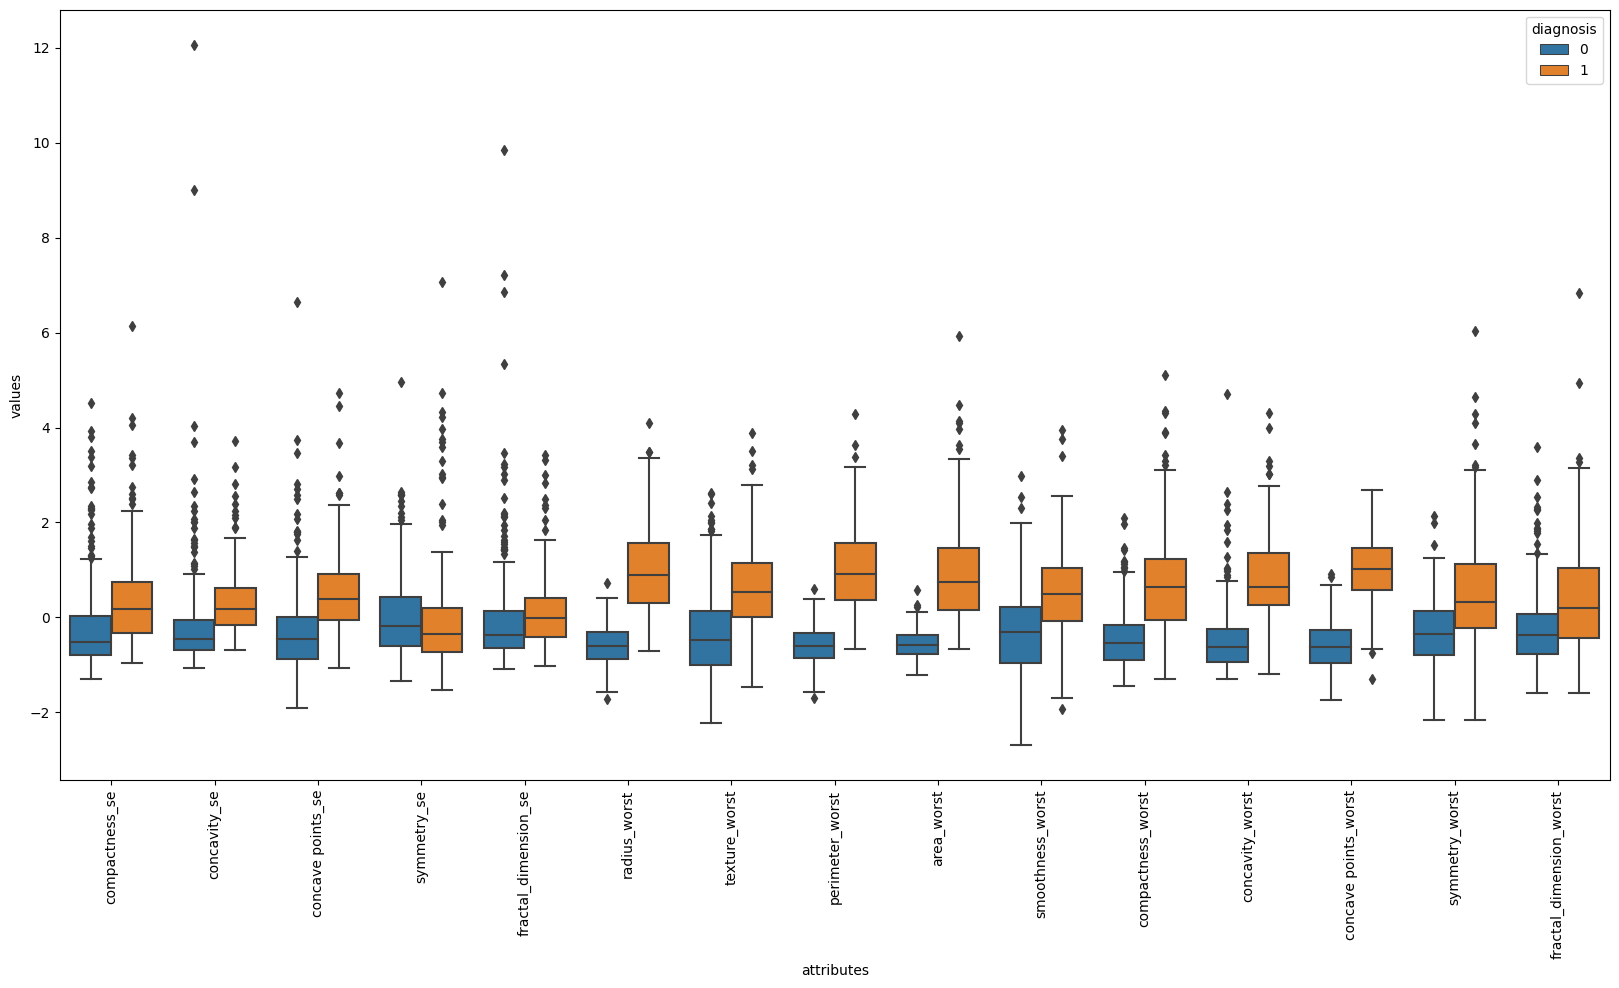

In [38]:
#last 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((x-x.mean())/x.std()).iloc[:,15:31]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data=data)
plt.xticks(rotation=90)

In [ ]:
#find correlation between diagnosis and attributes
df.corr()['diagnosis'].sort_values()

In [ ]:
#correlation heatmap
plt.figure(figsize = (40,40))
sns.heatmap(df.iloc[:, 1:31].corr(), annot = True, linewidths = 1)

In [35]:
#drop correlated columns

x_v1 = x.drop(['perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst', 'area_worst','texture_worst', 'concavity_mean','perimeter_se', 'area_se', 'concave points_worst' ], axis= 1)

x_v1.shape

(569, 20)

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(x_v1.iloc[:, 1:21].corr(), annot = True, linewidths = 1)

In [39]:
#drop 0.80 korrelated and above
x_v2 = x_v1.drop(['compactness_mean','concavity_worst','fractal_dimension_worst', 'concavity_se', 'fractal_dimension_se', 'smoothness_mean'], axis= 1)

x_v2.shape

(569, 14)

#Test w randomforest

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


Use random forrest on data v1


Accuracy: 0.9649122807017544
[[107   1]
 [  5  58]]


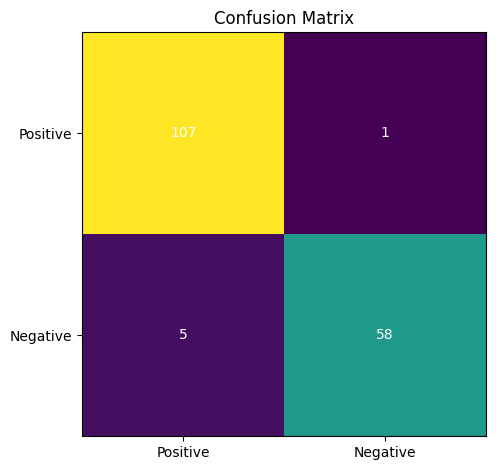

In [49]:
#split data
x_train, x_test, y_train, y_test= train_test_split(x_v1, y, test_size= 0.3, random_state=None)
#use Random Forest Classifier
rf_classifier= RandomForestClassifier(random_state=None)
rf_classifier= rf_classifier.fit(x_train, y_train)
#calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, rf_classifier.predict(x_test))
print('Accuracy: ' +str(accuracy))
confusion_m = confusion_matrix(y_test, rf_classifier.predict(x_test))


#visualize results
fig, ax = plt.subplots()
list_pos=['Positive', 'Negative']
list_ne =['Positive', 'Negative']
im = ax.imshow(confusion_m)
ax.set_xticks(np.arange(len(list_pos)),labels=list_pos)
ax.set_yticks(np.arange(len(list_ne)),labels=list_ne)
plt.setp(ax.get_xticklabels(), rotation=0)

for i in range(len(list_pos)):
  for j in range(len(list_ne)):
    text= ax.text(j,i,confusion_m[i, j], ha='center', va='center', color='w')

ax.set_title('Confusion Matrix')
fig.tight_layout()
print(confusion_m)
plt.show()



Use random forrest on data v2

Accuracy: 0.9649122807017544
[[109   5]
 [  1  56]]


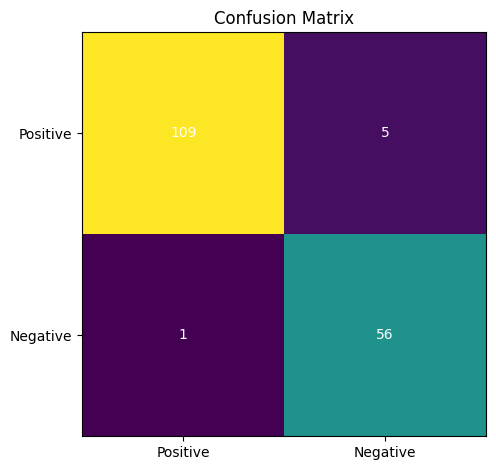

In [50]:
#split data
x_train, x_test, y_train, y_test= train_test_split(x_v2, y, test_size= 0.3, random_state=None)
#use Random Forest Classifier
rf_classifier= RandomForestClassifier(random_state=None)
rf_classifier= rf_classifier.fit(x_train, y_train)
#calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, rf_classifier.predict(x_test))
print('Accuracy: ' +str(accuracy))
confusion_m = confusion_matrix(y_test, rf_classifier.predict(x_test))


#visualize results
fig, ax = plt.subplots()
list_pos=['Positive', 'Negative']
list_ne =['Positive', 'Negative']
im = ax.imshow(confusion_m)
ax.set_xticks(np.arange(len(list_pos)),labels=list_pos)
ax.set_yticks(np.arange(len(list_ne)),labels=list_ne)
plt.setp(ax.get_xticklabels(), rotation=0)

for i in range(len(list_pos)):
  for j in range(len(list_ne)):
    text= ax.text(j,i,confusion_m[i, j], ha='center', va='center', color='w')

ax.set_title('Confusion Matrix')
fig.tight_layout()
print(confusion_m)
plt.show()



In [ ]:
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values
Y = Y.astype('int')
print(X.shape, Y.shape)

(569, 29) (569,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size= 0.30, random_state = 7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  # Set up a KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=neighbor)

  # Fit the model
  knn.fit(X_train, Y_train)

  # Compute accuracy
  train_accuracies[neighbor] = knn.score(X_train, Y_train)
  test_accuracies[neighbor] = knn.score(X_test, Y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.914572864321608, 3: 0.9195979899497487, 4: 0.8819095477386935, 5: 0.8919597989949749, 6: 0.8592964824120602, 7: 0.8417085427135679, 8: 0.8291457286432161, 9: 0.8266331658291457, 10: 0.8140703517587939, 11: 0.8266331658291457, 12: 0.8040201005025126} 
 {1: 0.8187134502923976, 2: 0.8245614035087719, 3: 0.8070175438596491, 4: 0.847953216374269, 5: 0.8070175438596491, 6: 0.8128654970760234, 7: 0.8011695906432749, 8: 0.7953216374269005, 9: 0.7719298245614035, 10: 0.7719298245614035, 11: 0.7953216374269005, 12: 0.7894736842105263}


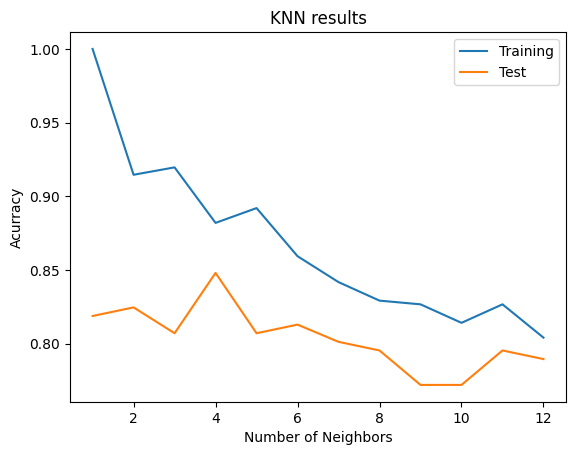

In [ ]:
#plot the KNN results
plt.title('KNN results')
plt.plot(neighbors, train_accuracies.values(), label = 'Training' )
plt.plot(neighbors, test_accuracies.values(), label = 'Test')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
def models(X_train, Y_train):
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 1)
  log.fit(X_train, Y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state= 1)
  tree.fit(X_train, Y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state= 1)
  forest.fit(X_train, Y_train)
  print('Log', log.score(X_train, Y_train))
  print('Des', tree.score(X_train, Y_train))
  print('Forst', forest.score(X_train, Y_train))
  return log, tree, forest

In [ ]:
model = models(X_train, Y_train)
print(model)

Log 0.6708542713567839
Des 1.0
Forst 0.9949748743718593
(LogisticRegression(random_state=1), DecisionTreeClassifier(criterion='entropy', random_state=1), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#burda 0 yaptım, 1 ile sonuç daha kötü TP, FP, TN, FN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model[1].predict(X_test))

print(cm)

print('accuracy: ' , (cm[0][0] + cm[1][1])/ (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  )

[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19 11  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5 15  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  6  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  5  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0